In [74]:
# Importing the libraries


In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [76]:
df = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\USA_Housing.csv")

In [77]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [78]:
df.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


> #### There is no null value in the dataset.

# EDA

In [80]:
# Dropping the columns which are not required

df.drop(["Address"], axis=1, inplace=True)

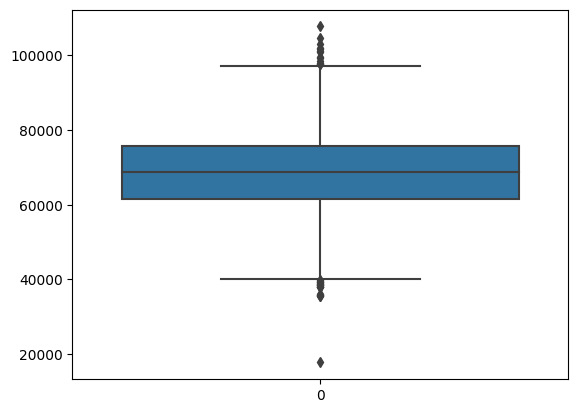

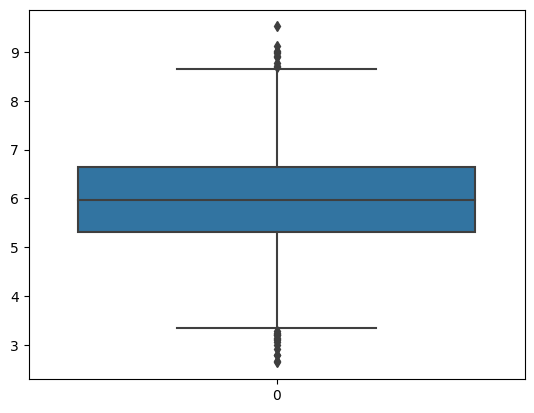

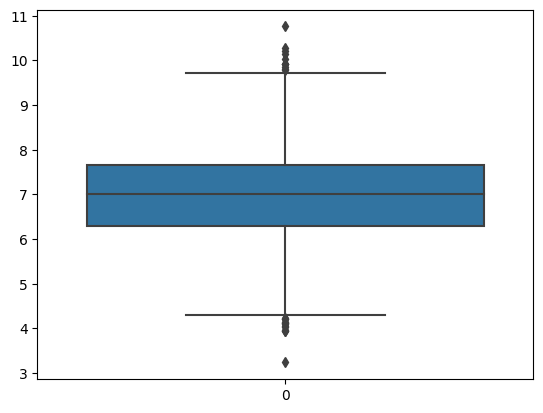

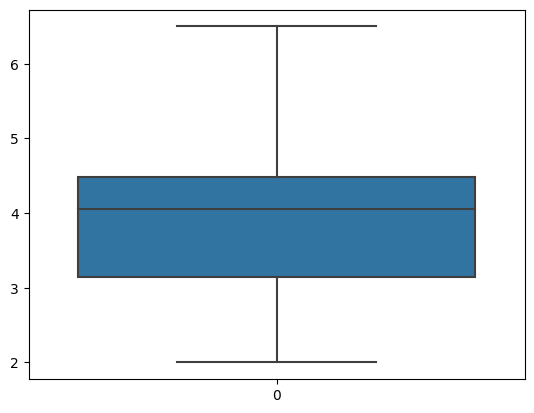

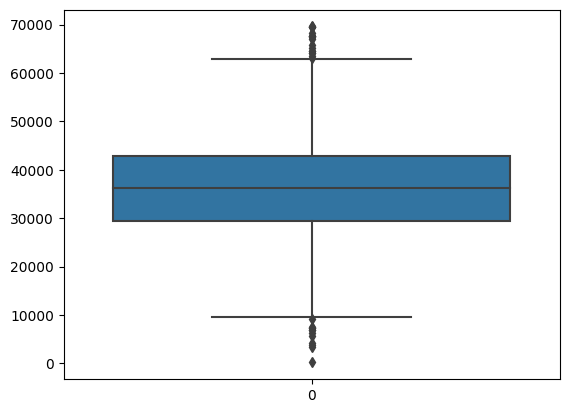

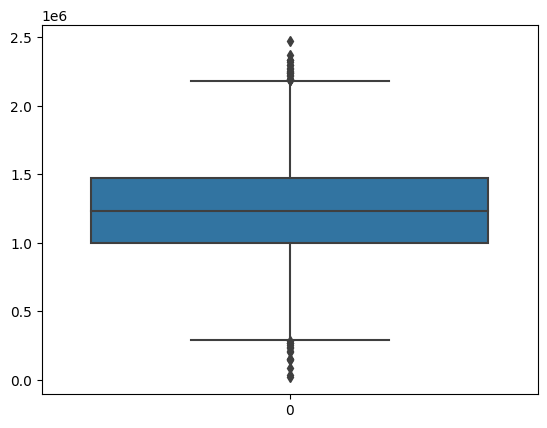

In [81]:
# Cheking Outliers using Boxplot

for i in df.columns:
    sns.boxplot(df[i])
    plt.show()


In [82]:
# Removing Outliers using zscore from scipy.stats

from scipy.stats import zscore

z = np.abs(zscore(df))
threshold = 3
print(np.where(z > 3))

df = df[(z < 3).all(axis=1)]
df.shape

(array([  39,  228,  256,  263,  314,  353,  411,  465,  496,  693,  693,
        924,  962, 1074, 1091, 1234, 1248, 1271, 1459, 1459, 1530, 1536,
       1595, 1628, 1661, 1734, 1757, 1777, 1799, 1799, 1891, 2066, 2092,
       2173, 2465, 2534, 2538, 2719, 2719, 2756, 2771, 2829, 2839, 2898,
       3069, 3134, 3138, 3212, 3336, 3541, 3806, 3855, 3989, 3991, 4087,
       4488, 4491, 4565, 4716, 4803, 4855], dtype=int64), array([0, 4, 5, 5, 4, 4, 0, 5, 2, 0, 5, 5, 0, 1, 1, 4, 5, 5, 0, 5, 4, 2,
       4, 1, 5, 0, 2, 1, 2, 5, 0, 2, 0, 4, 1, 4, 5, 0, 5, 4, 2, 4, 4, 1,
       0, 4, 1, 5, 2, 0, 2, 2, 1, 4, 0, 1, 4, 1, 4, 4, 0], dtype=int64))


(4943, 6)

In [91]:
# Converting Avg. Area Number of Rooms and Avg. Area Number of Bedrooms into int

# df["Avg. Area Number of Rooms"] = df["Avg. Area Number of Rooms"].astype(int)
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].astype(int)

<Axes: >

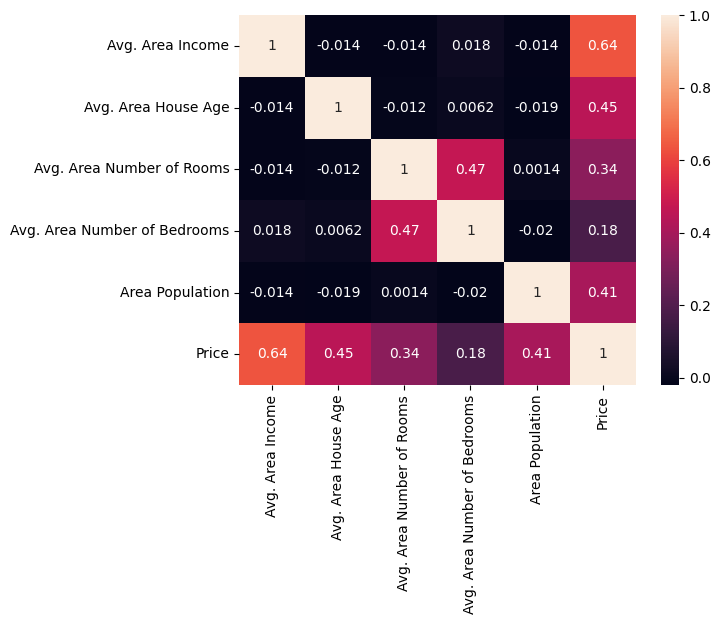

In [92]:
sns.heatmap(df.corr(), annot=True)


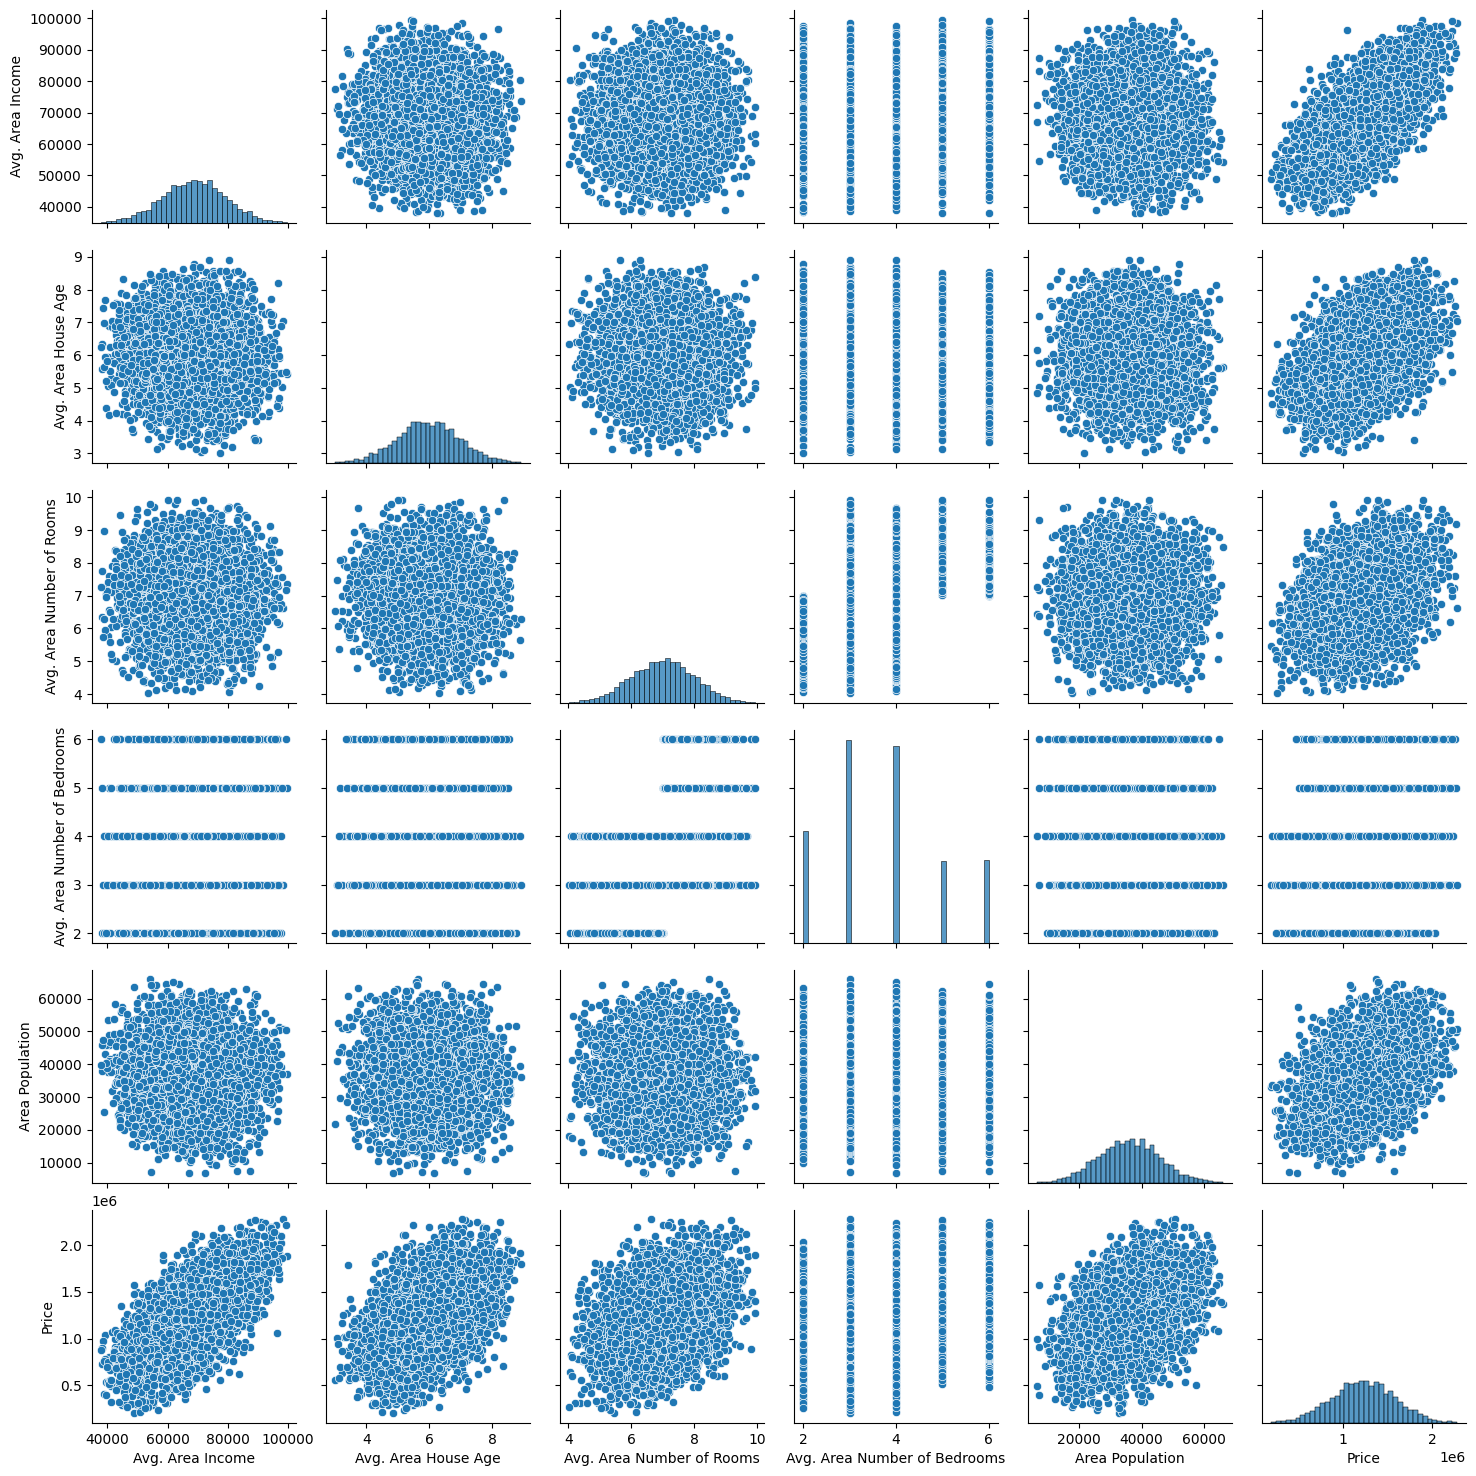

In [93]:
sns.pairplot(df)


# Linear Regression Model Creation

In [94]:
# Importing the linear regression model

from sklearn.linear_model import LinearRegression

# Importing the preprocessing libraries

from sklearn.preprocessing import StandardScaler

# Importing the train_test_split library

from sklearn.model_selection import train_test_split

# Importing the metrics libraries

from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [95]:
# Splitting the data into X and y
X = df.drop("Price", axis=1)
y = df[["Price"]]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# Scaling the data
sc = StandardScaler()
X_train[list(df.columns)[:-1]] = sc.fit_transform(X_train[list(df.columns)[0:-1]])
X_test[list(df.columns)[:-1]] = sc.transform(X_test[list(df.columns)[0:-1]])


# First Model

Model for Avg. Area Income
Mean Absolute Error: 214046.16445279354
Mean Squared Error: 70879506184.36932
Root Mean Squared Error: 266232.05326250504
R2 Score: 0.4035629414747288



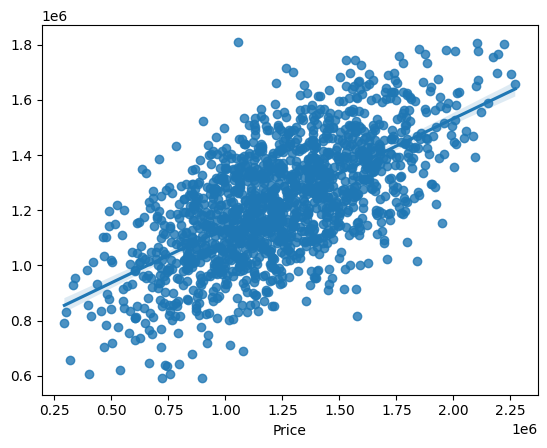



Model for Avg. Area House Age
Mean Absolute Error: 251222.05921602892
Mean Squared Error: 98238251164.92975
Root Mean Squared Error: 313429.8185637891
R2 Score: 0.1733445009186777



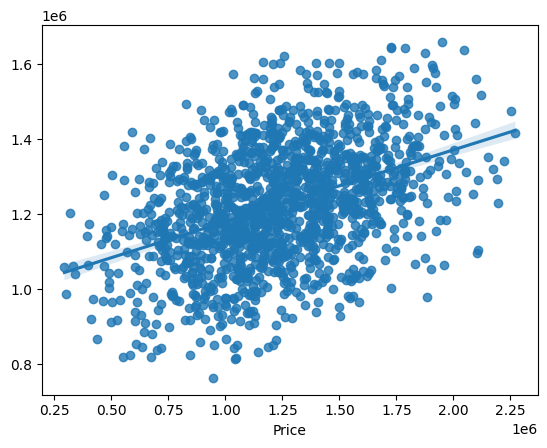



Model for Avg. Area Number of Rooms
Mean Absolute Error: 256057.59246449842
Mean Squared Error: 102048723605.82986
Root Mean Squared Error: 319450.65911002574
R2 Score: 0.14128012721479788



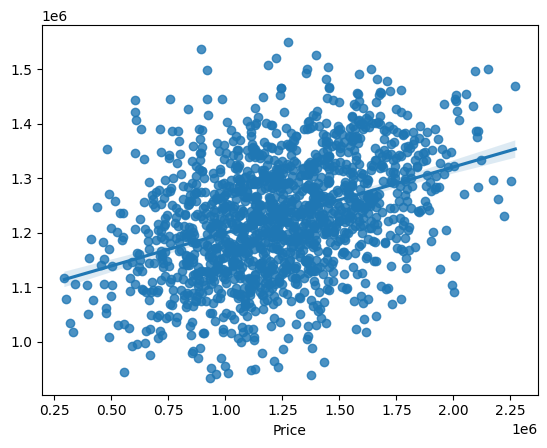



Model for Avg. Area Number of Bedrooms
Mean Absolute Error: 271416.3767834012
Mean Squared Error: 114373943760.2382
Root Mean Squared Error: 338192.1698683135
R2 Score: 0.037565831640419045



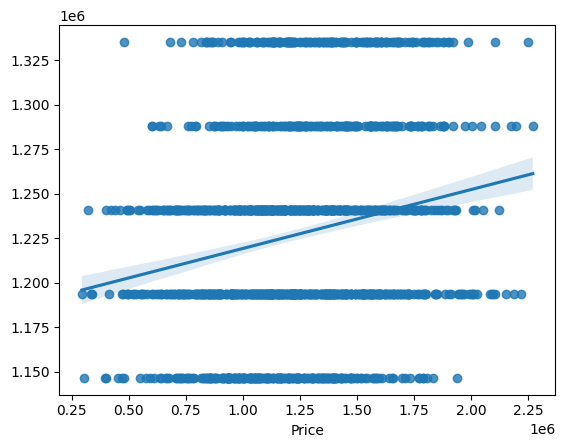



Model for Area Population
Mean Absolute Error: 250444.1567101264
Mean Squared Error: 98821890276.17136
Root Mean Squared Error: 314359.4921044557
R2 Score: 0.16843329296184206



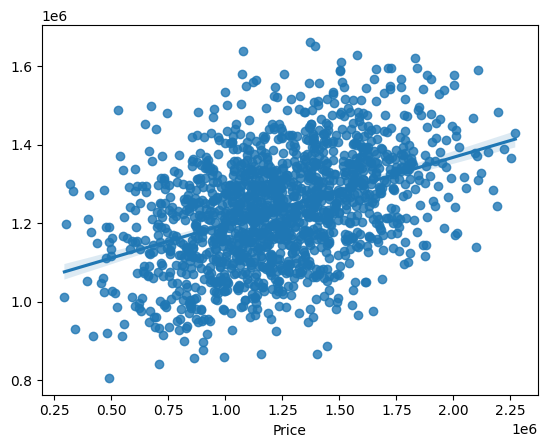

In [96]:
# Creating the model for every feature

for i in X.columns:
    model = LinearRegression()
    model.fit(X_train[[i]], y_train)
    y_pred = model.predict(X_test[[i]])
    print("Model for", i)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("")
    sns.regplot(x=y_test, y=y_pred)
    plt.show()
    print("\n")

> ### We can see that Avg. Area Income is the best feature for our model.

# Creating the 2nd model for 3 best features

Model for 3 best features
Mean Absolute Error: 147621.05292985364
Mean Squared Error: 33399668618.519955
Root Mean Squared Error: 182755.7622033296
R2 Score: 0.7189483790317112



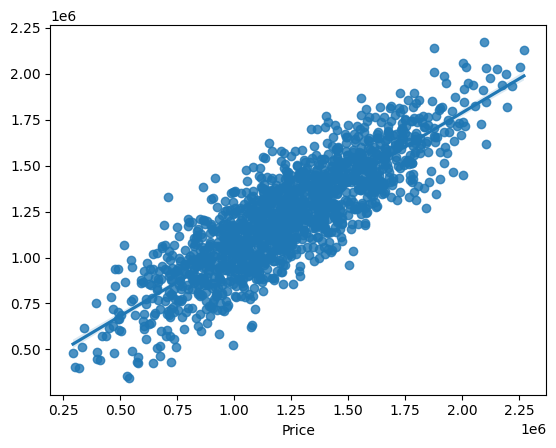

In [97]:
# Creating the model for with 3 best features (Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms)

model = LinearRegression()
model.fit(X_train[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms"]], y_train)
y_pred = model.predict(X_test[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms"]])

print("Model for 3 best features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()

# Making 3rd model with 3 worst features

Model for 3 worst features
Mean Absolute Error: 243901.28739331043
Mean Squared Error: 94104656965.63066
Root Mean Squared Error: 306764.8235466881
R2 Score: 0.2081278804607709



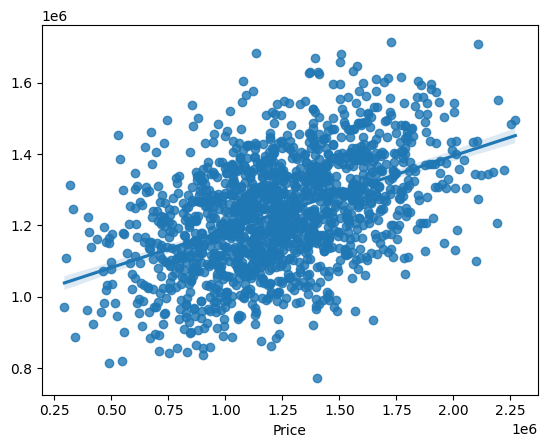

In [98]:
# Creating the model for with 3 worst features (Avg. Area Number of Bedrooms, Area Population, Avg. Area Number of Bedrooms)

model = LinearRegression()
model.fit(X_train[["Avg. Area Number of Bedrooms", "Area Population", "Avg. Area Number of Bedrooms"]], y_train)
y_pred = model.predict(X_test[["Avg. Area Number of Bedrooms", "Area Population", "Avg. Area Number of Bedrooms"]])

print("Model for 3 worst features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()

# Making 4th model for all the features

Model for all features
Mean Absolute Error: 80916.30758121664
Mean Squared Error: 10116285999.09592
Root Mean Squared Error: 100579.7494483652
R2 Score: 0.9148734494734425



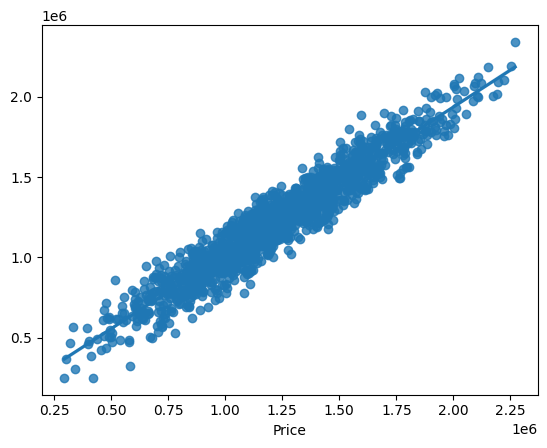

In [99]:
# Creating the model for with all features

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model for all features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()

In [ ]:
# We can see that the model with all features is the best model